In [66]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (20.0, 10.0)
plt.style.use('ggplot')
import numpy as np

In [3]:
CAREER_LENGTH = 5

In [4]:
credible_authors = pd.read_csv('data/authors-scientific-atleast-'+ str(CAREER_LENGTH) + '-year_extended.csv', encoding='utf-8')

In [22]:
credible_authors.head()

,author,start_year,end_year,num_pub,career_length,early_career_prod,early_career_qual,early_career_rec,final_citation_count,gender,successful
0,'maseka lesaoana,2001,2015,2,15,1,5.0,2,25.0,none,0.0
1,a aart blokhuis,1992,2005,2,14,1,0.0,0,0.0,none,0.0
2,a min tjoa,1979,2017,191,39,1,0.0,0,799.0,none,1.0
3,a-imam al-sammak,1992,2006,3,15,1,0.0,0,0.0,m,0.0
4,a-long jin,2011,2016,9,6,1,0.0,0,19.0,none,1.0


In [16]:
years = credible_authors.start_year.unique()

In [21]:
for year in years:
    temp = credible_authors[credible_authors.start_year == year]
    medi = temp.final_citation_count.median()
    credible_authors.loc[credible_authors.start_year == year, 'successful'] = credible_authors.loc[
        credible_authors.start_year == year, 'final_citation_count'].apply(lambda x: 1 if x >= medi else 0)

In [73]:
test_start_year = 1998

In [74]:
credible_test = credible_authors[credible_authors.start_year == test_start_year]

In [75]:
credible_test.head()

,author,start_year,end_year,num_pub,career_length,early_career_prod,early_career_qual,early_career_rec,final_citation_count,gender,successful
6,a-xing zhu,1998,2017,22,20,1,0.0,0,89.0,none,1.0
71,a. aguado,1998,2002,2,5,1,3.0,2,15.0,m,0.0
88,a. amin,1998,2009,4,12,3,2.0,0,9.0,none,0.0
167,a. bartels,1998,2014,2,17,1,0.0,0,0.0,m,0.0
254,a. c. verschueren,1998,2002,2,5,1,0.0,0,1.0,m,0.0


In [76]:
colors = credible_test.successful.apply(lambda x: 'black' if x==1 else 'white')

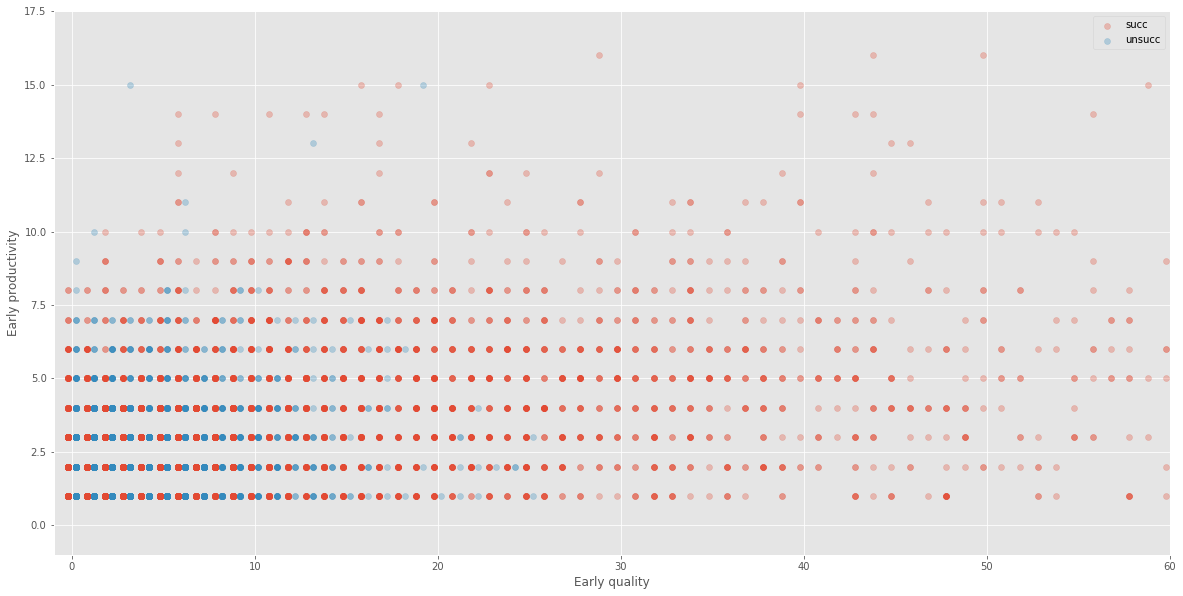

In [82]:
plt.scatter(credible_test[credible_test.successful == 1].early_career_qual - 0.2, 
            credible_test[credible_test.successful == 1].early_career_prod, label='succ', alpha=0.3) #, color=colors)
plt.scatter(credible_test[credible_test.successful == 0].early_career_qual + 0.2, 
            credible_test[credible_test.successful == 0].early_career_prod, label='unsucc', alpha=0.3) #, color=colors)
plt.xlabel('Early quality')
plt.ylabel('Early productivity')
plt.ylim((-1,17.5))
plt.xlim((-1,60))
plt.legend()
plt.show()

In [ ]:
## Correlation testing

In [78]:
np.corrcoef(credible_test.early_career_qual, credible_test.final_citation_count)

array([[1.        , 0.51130241],
       [0.51130241, 1.        ]])

In [79]:
from scipy.stats.stats import pearsonr   
pearsonr(credible_test.early_career_qual, credible_test.final_citation_count)

(0.5113024109958744, 0.0)

In [80]:
np.corrcoef(credible_authors.early_career_qual, credible_authors.final_citation_count)

array([[1.        , 0.25772612],
       [0.25772612, 1.        ]])

In [81]:
from scipy.stats.stats import pearsonr   
pearsonr(credible_authors.early_career_qual, credible_authors.final_citation_count)

(0.25772611507575777, 0.0)

In [116]:
citations_year_auth = pd.read_csv('./data/authors-perYear-citations-atleast-5-year.csv')

In [117]:
all_cited_authors = citations_year_auth.author.unique()

In [118]:
citations_year_auth = citations_year_auth.sort_values(by=['author', 'year_cit'])

In [119]:
# for cited_author in all_cited_authors:
#     citations_year_auth.loc[citations_year_auth.author == cited_author, 'cum_cit_count'] = citations_year_auth.loc[
#         citations_year_auth.author == cited_author,'cit_count'].cumsum()

In [120]:
citations_year_auth['cum_cit_count'] = citations_year_auth.groupby('author')['cit_count'].transform(pd.Series.cumsum)

In [121]:
citations_year_auth.head()

,author,year_cit,cit_count,cum_cit_count
0,'maseka lesaoana,2002,1,1
1,'maseka lesaoana,2003,1,2
2,'maseka lesaoana,2004,1,3
3,'maseka lesaoana,2005,2,5
4,'maseka lesaoana,2006,4,9


In [122]:
final_citation_count = credible_authors.set_index('author')['final_citation_count']

In [123]:
final_citation_count.head()

author
'maseka lesaoana     25.0
a aart blokhuis       0.0
a min tjoa          799.0
a-imam al-sammak      0.0
a-long jin           19.0
Name: final_citation_count, dtype: float64

In [124]:
final_citation_count['a min tjoa']

799.0

In [133]:
citations_year_auth[citations_year_auth.author == 'ünal ufuktepe']

,author,year_cit,cit_count,cum_cit_count,cum_cit_percent
4493589,ünal ufuktepe,2005,1,1,33.333333
4493590,ünal ufuktepe,2006,1,2,66.666667
4493591,ünal ufuktepe,2011,1,3,100.000000


In [132]:
credible_authors[credible_authors.author == 'ünal ufuktepe']

,author,start_year,end_year,num_pub,career_length,early_career_prod,early_career_qual,early_career_rec,final_citation_count,gender,successful
503856,ünal ufuktepe,2003,2016,12,14,3,2.0,1,3.0,none,0.0


In [127]:
citations_year_auth['cum_cit_percent'] = citations_year_auth.apply(
    lambda row: row.cum_cit_count*100.0/final_citation_count[row.author], axis=1)

In [134]:
citation_percentage_list = citations_year_auth.groupby('author')['cum_cit_percent'].apply(list)

In [140]:
credible_authors = credible_authors.set_index('author')
credible_authors['citation_percentage_list'] = citation_percentage_list

In [141]:
credible_authors.head()

,start_year,end_year,num_pub,career_length,early_career_prod,early_career_qual,early_career_rec,final_citation_count,gender,successful,citation_percentage_list
author,,,,,,,,,,,
'maseka lesaoana,2001,2015,2,15,1,5.0,2,25.0,none,0.0,"[4.0, 8.0, 12.0, 20.0, 36.0, 40.0, 52.0, 56.0,..."
a aart blokhuis,1992,2005,2,14,1,0.0,0,0.0,none,0.0,NaN
a min tjoa,1979,2017,191,39,1,0.0,0,799.0,none,1.0,"[0.2503128911138924, 0.37546933667083854, 0.87..."
a-imam al-sammak,1992,2006,3,15,1,0.0,0,0.0,m,0.0,NaN
a-long jin,2011,2016,9,6,1,0.0,0,19.0,none,1.0,"[15.789473684210526, 73.6842105263158, 100.0]"
